<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/Homework_2/Intro_to_ML_HW2_Problem_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/Housing.csv'

#Adding in the dummy column of 1's for X0
df = pd.DataFrame(pd.read_csv(url))

X0 = np.ones((len(df)))
X0 = pd.DataFrame(X0, columns = ['X0'])
df = pd.concat([pd.DataFrame(X0), df], axis = 1)

#Mapping function to map text entries in the data set to nuemerical values
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
  return x.map({'yes': 1, 'no':0})

df[varlist] = df[varlist].apply(binary_map)

In [28]:
#------------- Implimenting the 80% training set and 20% evaluatiuon(test) set
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [29]:
df_train_norm = df_train
df_test_norm = df_test

df_train_stand = df_train
df_test_stand = df_test

df_train_norm_op = df_train
df_test_norm_op = df_test

In [30]:
#---------------------- For Normalizing ----------------------#
#Input normalization pre-processing for the training & test datasets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Transforming everything except for the 'dummy', input and 'yes-no' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories']
house_price = ['price']
df_train_norm[num_vars] = scaler.fit_transform(df_train_norm[num_vars])
df_test_norm[num_vars] = scaler.fit_transform(df_test_norm[num_vars])

#---------------------- Normalized Output ----------------------#
df_test_output_norm = scaler.fit_transform(df_test_norm_op[house_price])
df_training_output_norm = scaler.fit_transform(df_train_norm_op[house_price])

In [31]:
#---------------------- For Normalizing ----------------------#
#--------------- Determaning the inputs/outputs ---------------#

#Training Dataset

training_inputs_norm = df_train_norm[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]
training_outputs = df_train[["price"]]

#Testing Dataset
testing_inputs_norm = df_test_norm[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]
testing_outputs = df_test[["price"]]

#--------------- Training dataset without normalizing the output ---------------#
training_inputs_norm = np.asarray(training_inputs_norm)
training_outputs = np.asarray(training_outputs)

#--------------- Testing dataset without normalizing the output ---------------#
testing_inputs_norm = np.asarray(testing_inputs_norm)
testing_outputs = np.asarray(testing_outputs)

#--------------- Normalized outputs for the test and training dataset ---------------#
training_output_norm = np.asarray((df_training_output_norm))
test_output_norm = np.asarray((df_test_output_norm))

In [32]:
from sklearn.preprocessing import StandardScaler
Standscaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train_stand[num_vars] = Standscaler.fit_transform(df_train_stand[num_vars])
df_test_stand[num_vars] = Standscaler.fit_transform(df_test_stand[num_vars])

In [33]:
#---------------------- For Standardizing ----------------------#
#--------------- Determaning the inputs/outputs ---------------#

#Training Dataset
training_inputs_stand = df_train_stand[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]

#Testing Dataset
testing_inputs_stand = df_test_stand[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]

#--------------- Training dataset without normalizing the output ---------------#
training_inputs_stand = np.asarray(training_inputs_stand)

testing_inputs_stand = np.asarray(testing_inputs_stand)

In [34]:
def regularized_loss_func(length, inputs, outputs, theta, reg_parameter):
  reg_thetas = theta[1:]
  predictions = inputs.dot(theta)
  errors = np.subtract(predictions, outputs)
  square_errors = np.square(errors)
  square_regularization = (np.square(reg_thetas))
  regularization = reg_parameter * (np.sum(square_regularization))
  cost = ( 1 / (2 * length) ) * ( np.sum(square_errors) + regularization)
  return cost

In [35]:
#----------------- Gradient Descent Function -----------------#
def regularized_gradient_descent(inputs, outputs, theta, learningRate, iterations, reg_parameter):
  data_loss = np.zeros(iterations)
  length = len(outputs)

  for i in range(iterations):
    predicted_values = inputs.dot(theta)
    error = np.subtract(predicted_values, outputs)
    gradients = (1/length) * ( inputs.transpose().dot(error))
    theta =  theta*( 1 - ( learningRate * ( (reg_parameter)/(length) )) ) - (learningRate * gradients)
    data_loss[i] = regularized_loss_func(length, inputs, outputs, theta, reg_parameter)

  return theta, data_loss

In [36]:
#---------------------- Computes the gradient descent, cost, and plots the loss ----------------------#
def compute_and_plot(learningRate, iterations, training_inputs, testing_inputs, training_outputs, testing_outputs, theta_size, reg_parameter):
  theta = np.zeros((theta_size,1))
  test_theta = np.zeros((theta_size,1))
  theta, training_loss = regularized_gradient_descent(training_inputs, training_outputs, theta, learningRate, iterations, reg_parameter)
  test_theta, test_loss = regularized_gradient_descent(testing_inputs, testing_outputs, test_theta, learningRate, iterations, reg_parameter)

  plt.grid(True)
  plt.plot(training_loss, label = 'Training Loss')
  plt.plot(test_loss, label = 'Test Loss')
  plt.xlabel("Iteration")
  plt.ylabel("Mean Square Error")
  plt.legend()
  plt.title(f"Training & Validation Loss vs. Iterations (Learning Rate = %f)"  % learningRate)

  plt.show()
  print(training_loss[iterations-1])

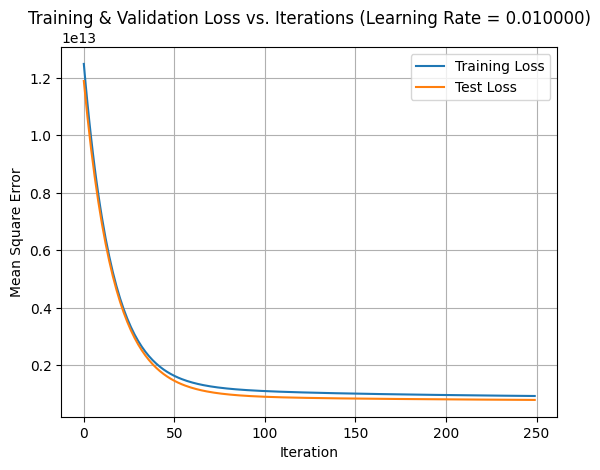

933534014002.7654


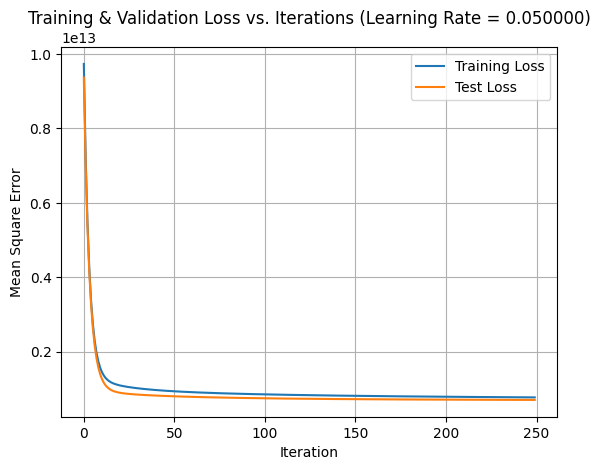

765901476966.886


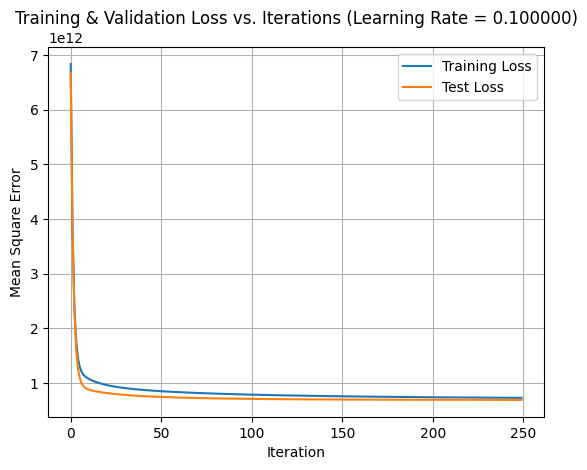

723916788970.5978


In [37]:
#Calculating the gradient descent for 12 inputs with input normalization
learningRate1 = 0.01
learningRate2 = 0.05
learningRate3 = 0.1
iterations = 250
reg_parameter = 5

compute_and_plot(learningRate1, iterations, training_inputs_norm, testing_inputs_norm, training_outputs, testing_outputs, 12, reg_parameter)
compute_and_plot(learningRate2, iterations, training_inputs_norm, testing_inputs_norm, training_outputs, testing_outputs, 12, reg_parameter)
compute_and_plot(learningRate3, iterations, training_inputs_norm, testing_inputs_norm, training_outputs, testing_outputs, 12, reg_parameter)

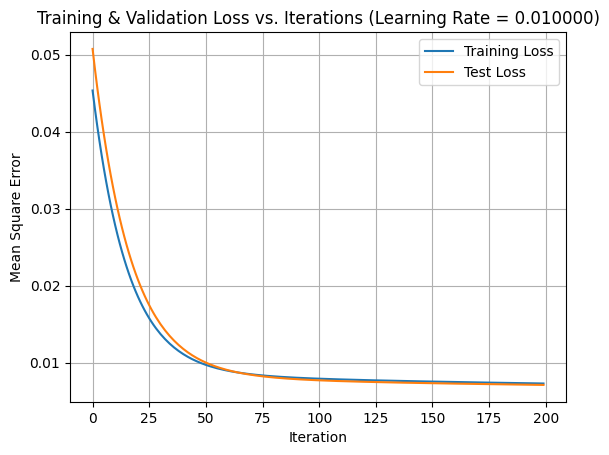

0.007310149698566823


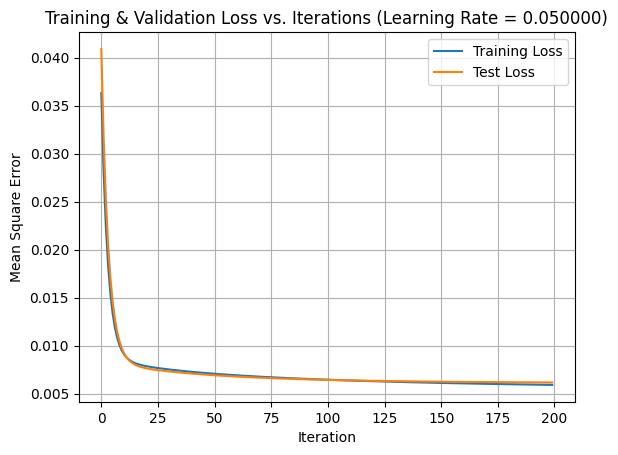

0.005923074353021949


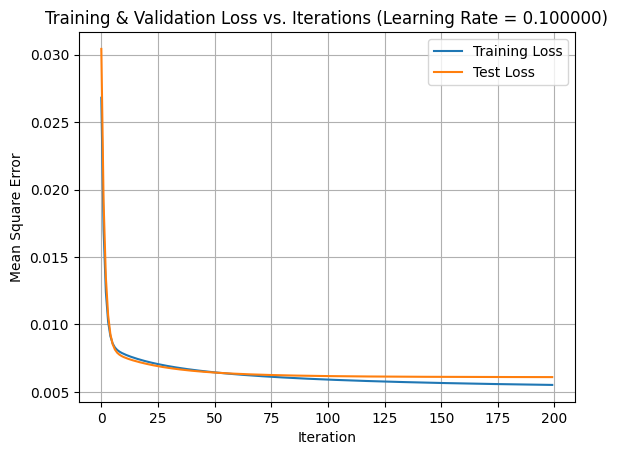

0.005520144360443709


In [38]:
#Calculating the gradient descent for 12, reg_parameter inputs with input normalization
learningRate1 = 0.01
learningRate2 = 0.05
learningRate3 = 0.1
iterations = 200
reg_parameter = 5

compute_and_plot(learningRate1, iterations, training_inputs_norm, testing_inputs_norm, training_output_norm, test_output_norm, 12, reg_parameter)
compute_and_plot(learningRate2, iterations, training_inputs_norm, testing_inputs_norm, training_output_norm, test_output_norm, 12, reg_parameter)
compute_and_plot(learningRate3, iterations, training_inputs_norm, testing_inputs_norm, training_output_norm, test_output_norm, 12, reg_parameter)

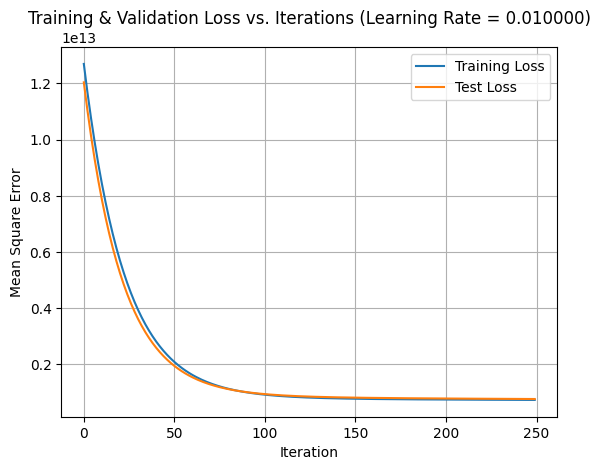

726271439871.6973


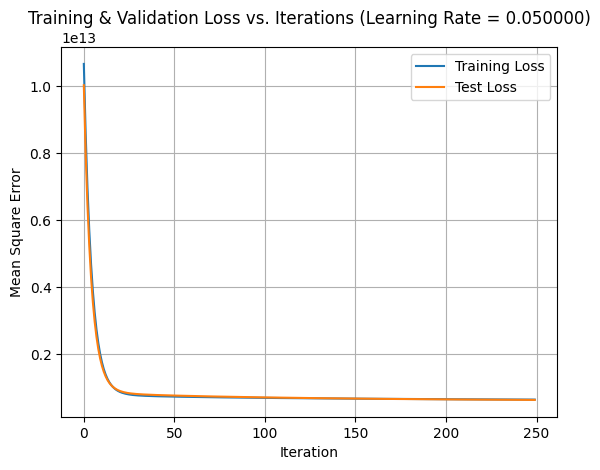

636563777225.2648


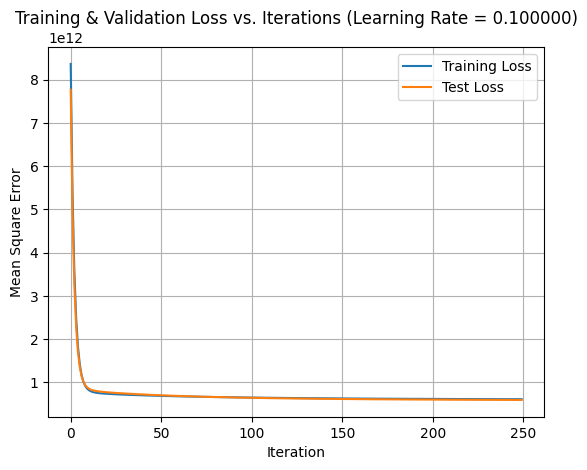

609707075612.0166


In [39]:
#Calculating the gradient descent for 12 inputs with standardization
learningRate1 = 0.01
learningRate2 = 0.05
learningRate3 = 0.1
iterations = 250
reg_parameter = 5

compute_and_plot(learningRate1, iterations, training_inputs_stand, testing_inputs_stand, training_outputs, testing_outputs, 12, reg_parameter)
compute_and_plot(learningRate2, iterations, training_inputs_stand, testing_inputs_stand, training_outputs, testing_outputs, 12, reg_parameter)
compute_and_plot(learningRate3, iterations, training_inputs_stand, testing_inputs_stand, training_outputs, testing_outputs, 12, reg_parameter)